Graphs and visualization
========================

A lot of the joy of digital humanities comes in handling our material in new ways, so that we see things we wouldn't have seen before. Quite literally.

Some of the most useful tools for DH work are graphing tools! Today we will look at the basics of what a graph is and how you might build one, both manually and programmatically, and then name the tools to look into if you want to know more.

Tools you'll need
-----------------

* Graphviz: http://www.graphviz.org
* The graphviz module for Python: 
        pip install graphviz
* The hierarchymagic extension for Jupyter notebook:
        pip install git+https://github.com/tla/ipython-hierarchymagic.git


So what can you do with graphs?

<img src="https://i.embed.ly/1/display/resize?key=1e6a1a1efdb011df84894040444cdc60&url=http%3A%2F%2Fpbs.twimg.com%2Fmedia%2FBslvzfjIcAAW6Ro.png">

You can visualize relationships, networks, you name it.

http://ckcc.huygens.knaw.nl/epistolarium/#


The DOT graph language
----------------------

It's pretty easy to start building a graph, if you have the tools and a plain text editor. First you have to decide whether you want a *directed* or an *undirected* graph. If all the relationships you want to chart are symmetric and two-way (e.g. "these words appear together" or "these people corresponded", then it can be undirected. But if there is any asymmetry (e.g. in social networks - just because Tom is friends with Jane doesn't mean that Jane is friends with Tom!) then you want a directed graph.

If you want to make a directed graph, it looks like this:

    digraph "My graph" {
        [... graph data goes here ...]
    }
    
and if you want to make an undirected graph, it looks like this.

    graph "My graph" {
        [... graph data goes here ...]
    }
    
Let's say we want to make that little two-person social network. In graph terms, you have *nodes* and *edges*. The edges are the relationships, and the nodes are the things (people, places, dogs, cats, whatever) that are related. The easiest way to express that is like this:

    digraph "My graph" {
        Tom -> Jane
    }

which says "The node `Tom` is connected to the node `Jane`, in that direction." We plug that into Graphviz, and what do we get? Let's use a little iPython magic to find out.

We are going to use an extension called 'hierarchymagic', which gives us the special `%%dot` command. Anytime you want to use graphs in Jupyter, this is how you do it.

In [1]:
# This is how you get the %%dot and %dotstr command that we use below.
%load_ext hierarchymagic  

Then you do this every time you want to make a graph. The `-f svg` says that it should make an SVG image, which is what I recommend.

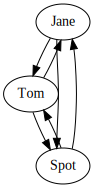

In [4]:
%%dot -f svg
digraph "My graph" {
    Jane -> Tom -> Spot
    Jane -> Spot
    Tom -> Jane
    Spot -> Tom
    Spot -> Jane
}

Now maybe Tom has a friend too:

    digraph "My graph" {
        Tom -> Jane
        Ben -> Tom
        Tom -> Ben
    }



In [10]:
%%dot -f svg
digraph "My graph" {
    Tom -- Jane
    Ben -- Tom
    Tom -> Ben
}

...And so on. But what if we do want a nice symmetrical undirected graph? That is even simpler. Instead of `digraph` we say `graph`, and instead of describing the connections with `->` we use `--` instead. If we have a model like Facebook where friendship is always two-way, we can do this:

    graph "My graph" {
        Tom -- Jane
        Ben -- Tom
    }

Note that we don't need the third line (`Tom -- Ben`) because it is now the same as saying `Ben -- Tom`.

Since this is an undirected graph, we want it to be laid out a little differently (not just straight up-and-down.) For this we can specify a different layout engine as a *graph attribute*. The options are `dot` (the default), `neato`, `twopi`, `circo`, `fdp`, and `sfdp`; they all take different approaches and you are welcome to play around with each one.

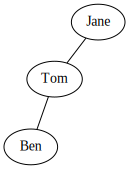

In [9]:
%%dot -f svg
graph "My graph" {
    graph [layout=neato]
    Tom -- Jane
    Ben -- Tom
}

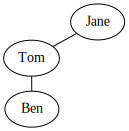

In [11]:
%%dot -f svg
graph "My graph" {
    layout=fdp
    Tom -- Jane
    Ben -- Tom
}

You can change the font, the shape of the nodes, the colors of the links, and so on by setting attributes in square brackets. Attributes can be set for the graph, for all nodes, for all edges, and for individual nodes and edges. All the different attribute options can be read about [here](http://www.graphviz.org/doc/info/attrs.html).

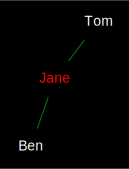

In [12]:
%%dot -f svg
graph "My pretty graph" {
    graph [layout=neato, bgcolor=black]
    node [shape=plain, fontcolor=white, fontname=Helvetica]
    Jane [fontcolor=red]
    Tom -- Jane [color=green]
    Jane -- Ben [color=green]    
}

Of course, this would hardly be fun if we couldn't do it programmatically!

Building graphs with Graphviz + Python
--------------------------------------

Now we are going to make a few graphs, not by writing out dot, but by making a *graph object* that holds our nodes and edges. We do this with the `graphviz` module. 

In [13]:
import graphviz     # Use the Python graphviz library

We make a new directed graph with `graphviz.Digraph()`, and a new undirected graph with `graphviz.Graph()`.

In [14]:
my_graph = graphviz.Digraph() #Digraph or Graph

Let's make a social network graph of five friends, all of whom like each other. But instead of typing out all those

    Anna -> Ben
    
sorts of lines, we will let the program do that for us.

In [18]:
# Our list of friends - using python NOT dot syntax
all_friends = [ 'Dracula', 'Frankenstein', 'Wolfman', 'Invisible Man', 'Hyde' ]

# Make them all friends with each other.
# As long as there are at least two people left in the list of friends...
while len( all_friends ) > 1:
    this_friend = all_friends.pop() # Remove the last name from the list
    for friend in all_friends:      # Cycle through whoever is left and make them friends with each other
        my_graph.edge( this_friend, friend )  # I like you
        my_graph.edge( friend, this_friend )  # You like me

# Spit out the graph in its DOT format
print(my_graph.source) #source of a Graph is always dot format

digraph {
	Hyde -> Dracula
	Dracula -> Hyde
	Hyde -> Frankenstein
	Frankenstein -> Hyde
	Hyde -> Wolfman
	Wolfman -> Hyde
	Hyde -> "Invisible Man"
	"Invisible Man" -> Hyde
	"Invisible Man" -> Dracula
	Dracula -> "Invisible Man"
	"Invisible Man" -> Frankenstein
	Frankenstein -> "Invisible Man"
	"Invisible Man" -> Wolfman
	Wolfman -> "Invisible Man"
	Wolfman -> Dracula
	Dracula -> Wolfman
	Wolfman -> Frankenstein
	Frankenstein -> Wolfman
	Frankenstein -> Dracula
	Dracula -> Frankenstein
	Hyde -> Dracula
	Dracula -> Hyde
	Hyde -> Frankenstein
	Frankenstein -> Hyde
	Hyde -> Wolfman
	Wolfman -> Hyde
	Hyde -> Invisible_Man
	Invisible_Man -> Hyde
	Invisible_Man -> Dracula
	Dracula -> Invisible_Man
	Invisible_Man -> Frankenstein
	Frankenstein -> Invisible_Man
	Invisible_Man -> Wolfman
	Wolfman -> Invisible_Man
	Wolfman -> Dracula
	Dracula -> Wolfman
	Wolfman -> Frankenstein
	Frankenstein -> Wolfman
	Frankenstein -> Dracula
	Dracula -> Frankenstein
	Hyde -> Dracula
	Dracula -> Hyde
	Hyde -> Fra

And here is a little iPython magic function so that we can actually make the graph display right here in the notebook. This means that, instead of copy-pasting what you see above into a new cell, you can just ask IPython to do the copy-pasting for you! 

Don't worry too much about understanding this (unless you want to!) but we will use it a little farther down. 

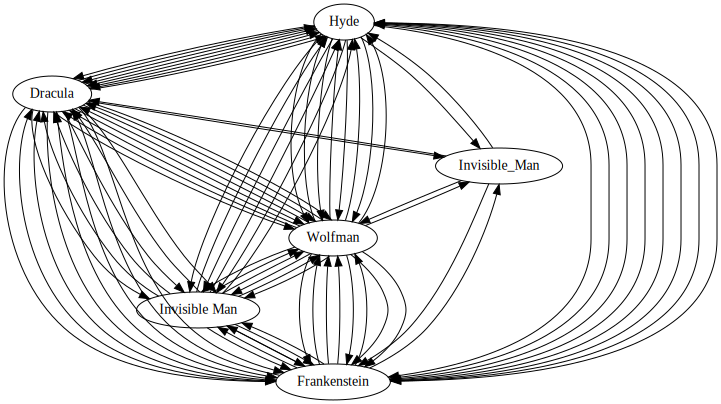

In [19]:
%dotstr -f svg
my_graph

Basic usage for the Graphviz python library
-------------------------------------------

So here is a short summary of what we did above that you will want to remember:

In [20]:
import graphviz;

this_graph = graphviz.Digraph()    # start your directed graph
this_undirected = graphviz.Graph() # ...or your undirected graph

this_graph.edge( "me", "you" )   # Add a relationship between me and you
this_undirected.edge( "me", "you" )

print(this_graph.source)       # Print out the dot.
print(this_undirected.source)

digraph {
	me -> you
}
graph {
	me -- you
}


Labels and IDs
--------------

When you are making a graph, it is important that every node be unique - if you have two people named Tom, then the graph program will have no idea which Tom is friends with Anna. So how do you handle having two people named Tom, without resorting to last names or AHV numbers or something like that?

You use *attributes* in the graph, and specifically the *label* attribute. It looks something like this:

    graph G {
        Tom1 [ label="Tom" ]
        Tom2 [ label="Tom" ]
        Tom1 -- Anna
        Tom1 -- Tom2
    }

Before this, we only named our nodes when we needed them to define a relationship (an edge). But if we need to give any extra information about a node, such as a label, then we have to list it first, on its own line, with the extra information between the square brackets.

There are a whole lot of options for things you might want to define! Most of them have to do with how the graph should look, and we will look at them in a minute. For now, this is what we get for this graph:

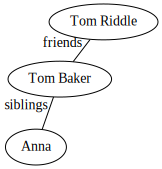

In [21]:
lg = graphviz.Graph()   # Make this one undirected
lg.graph_attr['layout'] = 'neato'
lg.node( "Tom1", label="Tom Baker" )
lg.node( "Tom2", label="Tom Riddle" )
lg.edge( "Tom1", "Anna", label="siblings" )
lg.edge( "Tom1", "Tom2", label="friends" )

%dotstr -f svg
lg

Notice, in this, that Anna still popped into existence when we referred to her in a relationship. But in the real world, we will probably want to declare our nodes with (for example) student numbers as the unique identifier, and names for display in the graph.

Styling the graph
-----------------

We can also set attributes on a graph using Python. Imagine that we want a graph that displays the relationships between members of a family and where they go each day.

Here's how we can do that in python, and what we get.

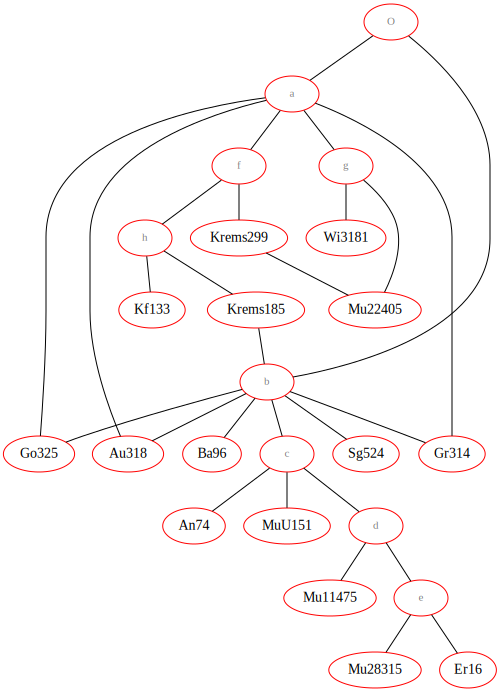

In [26]:
copying_relations = [
  ("O", "a"),
  ("O", "b"),
  ("a", "Au318"),
  ("a", "Go325"),
  ("a", "Gr314"),
  ("a", "f"),
  ("a", "g"),
  ("b", "Au318"),
  ("b", "Ba96"),
  ("b", "Go325"),
  ("b", "Gr314"),
  ("b", "Sg524"),
  ("b", "c"),
  ("c", "An74"),
  ("c", "MuU151"),
  ("c", "d"),
  ("d", "Mu11475"),
  ("d", "e"),
  ("e", "Er16"),
  ("e", "Mu28315"),
  ("f", "Krems299"),
  ("f", "h"),
  ("g", "Mu22405"),
  ("g", "Wi3181"),
  ("h", "Kf133"),
  ("h", "Krems185"),
  ("Krems185", "b"),
  ("Krems299", "Mu22405")]

# Make a set of our witnesses so we can list them out with their attributes
witnesses = set()
for source, target in copying_relations:
    witnesses.add(source)
    witnesses.add(target)

# Make our stemma graph
stemma = graphviz.Digraph()
stemma.node_attr['fillcolor'] = 'white'
stemma.node_attr['color'] = 'red'
stemma.edge_attr['arrowhead'] = "none"

# Add our nodes
for witness in witnesses:
    if len(witness) == 1:  # It is a hypothetical / reconstructed witness
        stemma.node(witness, fontcolor="grey", fontsize="11")
    else:
        stemma.node(witness)

# Add our edges
for source, target in copying_relations:
    stemma.edge(source, target)

# Make the cell with the dot
%dotstr -f svg
stemma

All done! There are a huge number of styling attributes - ways to control line thickness, color, shape, graph direction, and so on. They are documented in eye-watering detail here:

http://www.graphviz.org/content/attrs

In [ ]:
# if I'm not in Jnotebook, how do I make a graph?
# write the dot file into a text file and save as either DOT or GV suffix
# from command-line use the dot binary:
# rmulliga$ dot -Tsvg stemma.gv > stemma.svg
# rmulliga$ print(stemma.source)
# rmulliga$ open stemma.svg